In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
k_true = 0.7
b_true = 2.0
total_points = 1000

In [4]:
x = tf.random.uniform(shape=[total_points], 
                      minval=0,
                      maxval=10,
                      dtype=tf.float32)

In [5]:
noise = tf.random.normal(shape=[total_points],
                        stddev=0.2)

In [6]:
y = x * k_true + b_true + noise

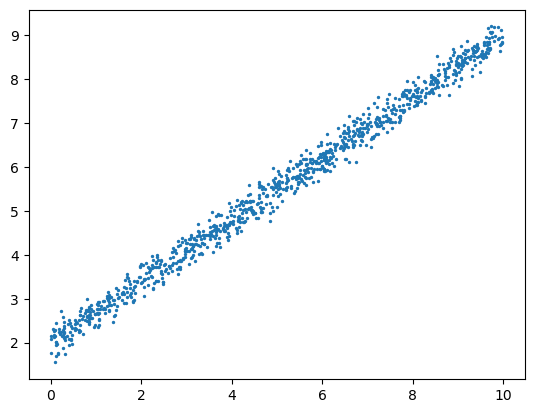

In [7]:
plt.scatter(x, y, s=2)
plt.show()

In [8]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

In [9]:
epochs = 50
learning_rate = 0.02

batch_size = 100
num_steps = total_points // batch_size

In [10]:
for i in range(epochs):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch + 1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch + 1) * batch_size]
    
        with tf.GradientTape() as tape:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = tape.gradient(loss, [k, b])

        k.assign_sub(learning_rate * dk)
        b.assign_sub(learning_rate * db)

In [11]:
print(k, b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7029461> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9801003>


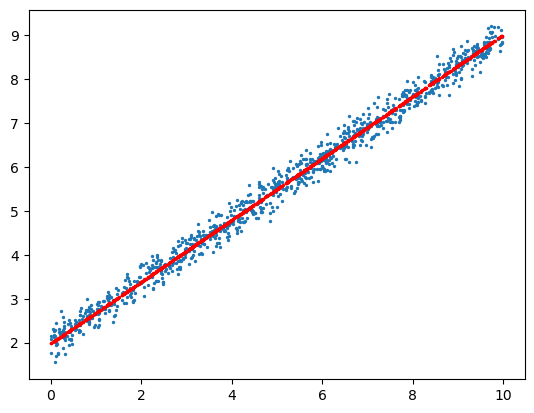

In [12]:
y_pr = x * k + b

plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, s=2, c='r')
plt.show()

In [13]:
opt = tf.optimizers.legacy.SGD(learning_rate=learning_rate)

for i in range(epochs):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch + 1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch + 1) * batch_size]
    
        with tf.GradientTape() as tape:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = tape.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))

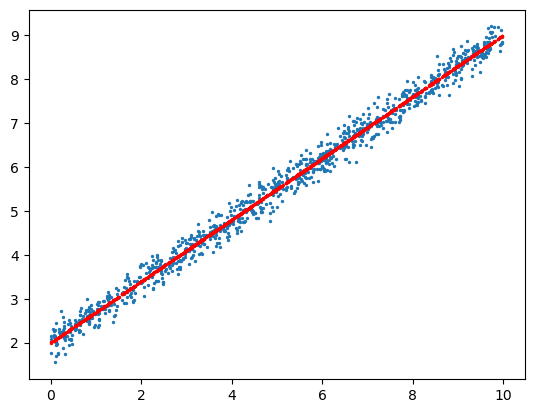

In [14]:
y_pr = x * k + b

plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, s=2, c='r')
plt.show()

In [15]:
opt = tf.optimizers.legacy.SGD(learning_rate=learning_rate, momentum=0.5)

for i in range(epochs):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch + 1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch + 1) * batch_size]
    
        with tf.GradientTape() as tape:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = tape.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))

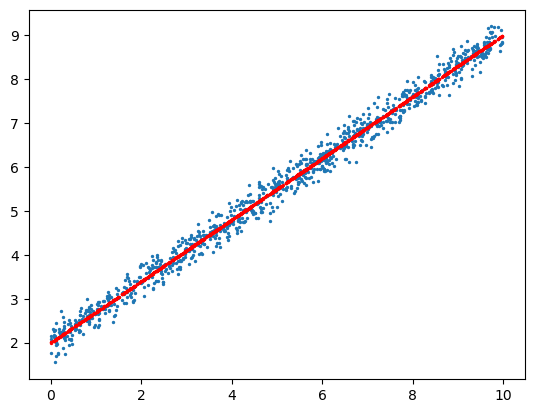

In [16]:
y_pr = x * k + b

plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, s=2, c='r')
plt.show()

In [17]:
opt = tf.optimizers.legacy.Adagrad(learning_rate=learning_rate)

for i in range(epochs):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * batch_size : (n_batch + 1) * batch_size]
        x_batch = x[n_batch * batch_size : (n_batch + 1) * batch_size]
    
        with tf.GradientTape() as tape:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))

        dk, db = tape.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))

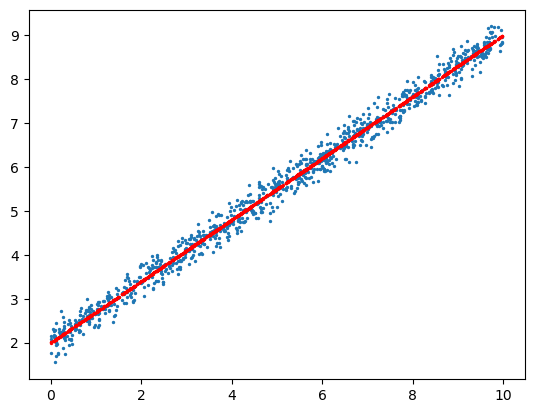

In [18]:
y_pr = x * k + b

plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, s=2, c='r')
plt.show()

----

In [30]:
class DenseNN(tf.Module):
    def __init__(self, outputs):
        super().__init__()
        self.outputs = outputs
        self.fl_init = False
        
    def __call__(self, x):
        if self.fl_init == False:
            self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name='w')
            self.b = tf.zeros([self.outputs], dtype=tf.float32, name='b')

            self.w = tf.Variable(self.w)
            self.b = tf.Variable(self.b)

            self.fl_init = True
            
        y = x @ self.w + self.b
        return y

In [31]:
model = DenseNN(1)

In [32]:
x_train = tf.random.uniform(shape=(100, 2), maxval=10, minval=0)

In [33]:
y_train = [a + b for a, b in x_train]

In [36]:
loss = lambda y, y_pred: tf.reduce_mean(tf.square(y - y_pred))
opt = tf.optimizers.legacy.Adam(learning_rate=learning_rate)

In [40]:
epochs = 1000

In [41]:
for i in range(epochs):
    
    for x, y in zip(x_train, y_train):
        x = tf.expand_dims(x, axis=0)
        y = tf.constant(y, shape=(1, 1))
        
    with tf.GradientTape() as tape:
        f_loss = loss(y, model(x))

    grads = tape.gradient(f_loss, model.trainable_variables)
    opt.apply_gradients(zip(grads, model.trainable_variables))
    
#     print(f_loss.numpy())

In [42]:
print(model.trainable_variables)

(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.7900807], dtype=float32)>, <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.84856504],
       [0.84925336]], dtype=float32)>)


In [43]:
print(model(tf.constant([[1.0, 2.0]])))

tf.Tensor([[3.3371525]], shape=(1, 1), dtype=float32)


---